# Linear Least Squares for Fitting Polynomials

In [2]:
# generate some data from a polynomial w/ a pretty low 4th order coefficient
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

# generate data from a polynomial
def data_generate(size, noise=False, noise_coeff=0.1):
    data = 4*(np.random.rand(size)-0.5)
    labels = list(map(lambda x: -.05*x**5 + .22*x**4 + 
                      .02*x**3 - .2*x**2 + .4*x, data))
    if noise:
        labels = np.asarray(labels)
        labels += np.random.normal(scale=noise_coeff, size=size)
        labels = list(labels)
    return data, labels

# fit a polynomial of degree "order" from data to labels
def fit(data, labels, order):
    """
    Takes the data and returns the parameters of a polynomial of 
    order "order" 
    """
    func = lambda x: [x**i for i in range(1, order+1)]
    X = np.asarray(list((map(func, data))))
    # perform the least squares fit on the data
    LS_params = np.dot(LA.inv(X.T@X)@X.T, labels)
    np.dot(LA.inv(X.T@X)@X.T, labels)
    return list(LS_params)

# plot the result of a fitting procedure
def plot_fit(data, labels, order):
    params = fit(data, labels, order)
    print(params)
    zip_iter = zip([i for i in range(1,order+1)], params)
    powers = [i for i in range(1,order+1)]
    func = lambda x: sum([param*(x**i) for i, param in zip(powers, params)])
    fitted_data = list(map(func, data))
    sorted_fit = [y for x, y in sorted(zip(data, fitted_data))]
    plt.plot(sorted(data), sorted_fit, label='fit of order {}'.format(i))
    plt.legend()
    plt.xlabel('x values')
    plt.ylabel('p(x)')

# compute the mean square error of a fit
def compute_error(data, labels, order):
    params = fit(data, labels, order)
    zip_iter = zip([i for i in range(1,order+1)], params)
    powers = [i for i in range(1,order+1)]
    func = lambda x: sum([param*(x**i) for i, param in zip(powers, params)])
    fitted_data = list(map(func, data))
    error = [a-b for a, b in zip(fitted_data, labels)]
    return np.mean(np.square(error))

def plot_data(data, labels):
    plt.figure()
    plt.scatter(data, labels)

# First, lets generate data from a polynomial

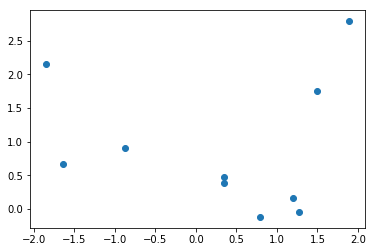

In [7]:
# polynomial of order 5 
data, labels = data_generate(10, noise=True, noise_coeff=0.5)
plot_data(data, labels)

# Compute a fit and plot it 

[0.14113591549635118]
[0.0363028037454465, 0.5622199243273696]
[-0.6125886486801806, 0.5863793574112851, 0.2524293560552052]
[-0.33492374696251814, 0.08727419112314039, 0.1648081729285969, 0.166270125676436]
[-0.6627935656740709, 0.015662806634991033, 0.5626017592445423, 0.191043608096539, -0.0909758473382579]


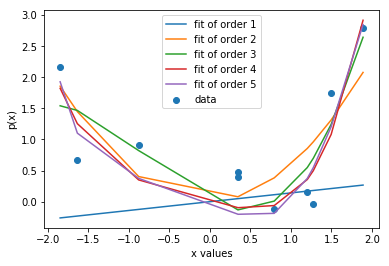

In [8]:
max_order = 6
plt.figure()
plt.scatter(data, labels, label='data')
for i in range(1,max_order): 
    plot_fit(data, labels, i)
plt.show()

## Compute the least squares error of each approximation

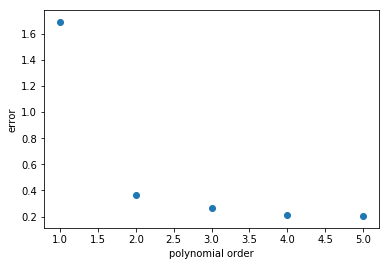

In [12]:
errors = np.zeros(max_order-1)
for i in range(1,max_order): 
    errors[i-1] = compute_error(data, labels, i)
plt.figure()
plt.scatter([i for i in range(1,max_order)], errors)
plt.xlabel('polynomial order')
plt.ylabel('error')
plt.show()

# Linear Regression w/ different Losses

## Plot the different losses

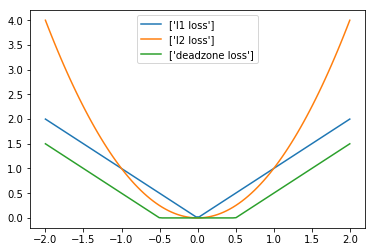

In [9]:
import matplotlib.pyplot as plt
import numpy as np
def l1_loss_plot(plot, x_range):
    x_labels = np.linspace(x_range[0], x_range[1], 100)
    y_labels = [np.abs(error) for error in x_labels]
    plot.plot(x_labels, y_labels, label=['l1 loss'])
    
def l2_loss_plot(plot, x_range):
    x_labels = np.linspace(x_range[0], x_range[1], 100)
    y_labels = [np.square(error) for error in x_labels]
    plot.plot(x_labels, y_labels, label=['l2 loss'])

def deadzone_loss_plot(plot, x_range, deadzone=0.2):
    x_labels = np.linspace(x_range[0], x_range[1], 100)
    y_labels = [np.maximum(0, np.abs(error)-deadzone) for error in x_labels]
    plot.plot(x_labels, y_labels, label=['deadzone loss'])

plt.figure()
l1_loss_plot(plt, [-2, 2])
l2_loss_plot(plt, [-2, 2])
deadzone_loss_plot(plt, [-2, 2], deadzone=0.5)
plt.legend()
plt.show()


## Utility functions

### Generate data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear_data(size, dim, perturb=False, perturb_scale=1):
    np.random.seed(0)
    weights = np.random.rand(dim)-0.5
    x_values = np.random.rand(size, dim-1)-0.5
    y_values = (x_values@weights[0:-1] + weights[-1] )
    if perturb:
        y_values += np.random.normal(scale=perturb_scale,size=size)
    return x_values, y_values, weights

def generate_outliers(size, dim, scale=1):
    outlier_x = scale*np.random.rand(size, dim-1) 
    outlier_y = scale*np.random.rand(size)
    return outlier_x, outlier_y


## Losses of data

In [2]:

def predict(weights, data):
    return data@weights

def l1_residuals(data, values, weights):
    predicted_val = predict(weights, data)
    error = predicted_val - values
    return np.abs(error)

def l1_loss(data, values, weights):
    predicted_val = predict(weights, data)
    error = predicted_val - values
    return np.sum(np.abs(error))/values.shape[0]

def l1_grad(data, values, weights):
    predicted_val = predict(weights, data)
    diff = predicted_val - values
    pos_mask = diff > 0
    neg_mask = diff < 0 
    grad = np.sum(data[pos_mask], axis=0)
    grad -= np.sum(data[neg_mask], axis=0)
    grad = grad/values.shape[0]
    return grad
    
def l2_residuals(data, values, weights):
    predicted_val = predict(weights, data)
    error = predicted_val - values
    return np.square(error)  
    
def l2_loss(data, values, weights):
    predicted_val = predict(weights, data)
    error = predicted_val - values
    return np.sum(np.square(error))/values.shape[0]

def l2_grad(data, value, weights):
    predicted_val = predict(weights, data)
    error = predicted_val-value
    return 2*(error).T@data/value.shape[0]

def deadzone_residuals(data, values, weights, deadzone):
    predicted_val = predict(weights, data)
    error = predicted_val - values
    return np.maximum(0, np.abs(error)-deadzone)

def deadzone_loss(data, values, weights, deadzone):
    predicted_val = predict(weights, data)
    error = predicted_val - values
    return np.sum(np.maximum(0, np.abs(error)-deadzone))/values.shape[0]

def deadzone_grad(data, values, weights, deadzone):
    predicted_val = predict(weights, data)
    error = predicted_val-values
    deadzone_left_mask = error < -np.abs(deadzone)
    deadzone_right_mask = error > np.abs(deadzone)
    deadzone_mask = np.logical_or(deadzone_left_mask, deadzone_right_mask)
    deadzone_data = data[deadzone_mask]
    deadzone_values = values[deadzone_mask]
    if deadzone_values.shape[0] > 0: 
        return l1_grad(deadzone_data, deadzone_values, weights)
    else:
        return np.zeros(weights.shape)

def huber_loss(data, values, weights, boundary):
    predicted_val = predict(weights, data)
    error = predicted_val-values
    boundary_left_mask = error < -np.abs(boundary)
    boundary_right_mask = error > np.abs(boundary)
    boundary_mask = np.logical_or(boundary_left_mask, boundary_right_mask)
    inner_error = l2_loss(data[boundary_mask], values[boundary_mask], weights)
    not_mask = np.logical_not(boundary_mask)
    out_data = data[not_mask]
    out_values = values[not_mask]
    N = boundary_mask.shape[0]
    M = not_mask.shape[0]
    out_error = boundary*(2*l1_loss(out_data, out_values, weights) - boundary)
    return (inner_error*N + out_error*M)/(N+M)
    
def huber_grad(data, values, weights, boundary):
    predicted_val = predict(weights, data)
    error = predicted_val-values
    boundary_left_mask = error < -np.abs(boundary)
    boundary_right_mask = error > np.abs(boundary)
    boundary_mask = np.logical_or(boundary_left_mask, boundary_right_mask)
    inner_grad = l2_grad(data[boundary_mask], values[boundary_mask], weights)
    not_mask = np.logical_not(boundary_mask)
    out_grad = 2*boundary*l1_grad(data[not_mask], values[not_mask], weights)
    
def sgd(weights, grad, step_size=0.1):
    return weights - step_size*grad

def batch_indices(data_size, batch_size):
    batch_size = min(data_size, batch_size)
    indices = [np.random.randint(low=0, high=data_size)
                   for _ in range(batch_size)]
    return indices

## Effect of different losses
 

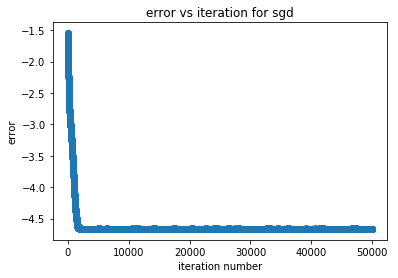

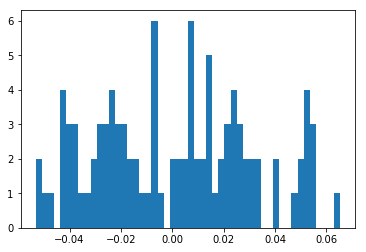

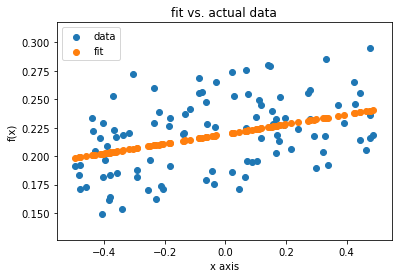

runtime is 8.168601036071777 seconds


In [4]:
import time
t = time.time()
############################ PARAMS #############################
dim = 2 # dim of data 30 for residual visualization, 2 otherwise
num_iters = 50000 # number of iterations of descent
num_data = 100 # number of data points, 100 for residual visualization
batch_size = 32 # SGD batch-size, set equal to num_data if GD 
deadzone_range = 0.02 # boundary of deadzone
perturb_scale = 0.03 # scale factor for error
perturb= True # whether to perturb data with noise
deadzone = True # use a deadzone loss
huber = False # use a huber loss
outliers = False # add outliers to the dataset
num_outliers = 1 # how many outliers to add
#####################################################################

############################# LOSS CHOICE #########################

if deadzone: 
    loss_func = deadzone_loss
    grad_func = deadzone_grad
    res_func = deadzone_residuals
else:
    loss_func = l1_loss
    grad_func = l1_grad
    res_func = l1_residuals
    
###################################################################

############################ Construct your data ##################


x_val, y_val, true_weights = generate_linear_data(num_data, dim, 
                                                  perturb=perturb, 
                                                  perturb_scale=perturb_scale)
if outliers:
    x_out, y_out = generate_outliers(num_outliers, dim)
    x_val = np.vstack((x_out, x_val))
    y_val = np.concatenate((y_out, y_val))

# append all inputs with 1s for fitting procedure
x_val = np.hstack((x_val, np.ones((x_val.shape[0], 1))))

#####################################################################


########################## GRADIENT DESCENT ########################
weights = np.random.rand(dim)
index = [i for i in range(num_iters)]
loss = np.zeros(num_iters)
grad_norm = np.zeros(num_iters)
for i in range(num_iters):
    indices = batch_indices(num_data, batch_size)
    x_select = x_val[indices, :]
    y_select = y_val[indices]
    if deadzone or huber:
        loss[i] = loss_func(x_val, y_val, weights, deadzone_range)
        grad = grad_func(x_select, y_select, weights, deadzone_range)
    else:
        loss[i] = loss_func(x_val, y_val, weights)
        grad = grad_func(x_select, y_select, weights)
    grad_norm[i] = np.linalg.norm(grad)
    #print('grad is ', grad)
    weights = sgd(weights, grad, .001)

####################################################################

######################### PLOTTING ##################################
y_predict = predict(weights, x_val)

plt.figure()
plt.scatter(index, np.log(loss))
plt.xlabel('iteration number')
plt.ylabel('error')
plt.title('error vs iteration for sgd')

plt.figure()
plt.hist(y_val - y_predict, bins=50)

if dim == 2:
    x_val = x_val[:,0]
    plt.figure()
    plt.scatter(x_val, y_val, label='data')
    plt.scatter(x_val, y_predict, label='fit')
    plt.title('fit vs. actual data')
    plt.xlabel('x axis')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

####################################################################
print('runtime is {} seconds'.format(time.time() - t))

# Penalties and Outliers

Lets examine how different penalties are affected by a ton of outliers. 